In [2]:
import rasterio
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import pandas as pd 
import geopandas as gpd 

import rasterio       # For reading .tif files
import matplotlib.pyplot as plt  # For plotting
import numpy as np
import pdb 
import xarray as xr

import rioxarray as xrio
import cv2


In [3]:
#input files
file_f = '/data/IMFSE/PythonCourse/LCP/lcp_pgd80.tif'
file_atm = '/data/IMFSE/PythonCourse/MNH/FCAST_model3.nc'

In [4]:
#load terrain from fire
ds_f = xrio.open_rasterio(file_f, decode_times=False)
terrain_f = ds_f.isel(band=0)
mask=np.where(terrain_f.values==-9999,0,1).astype(np.uint8)
mask = cv2.morphologyEx(mask, cv2.MORPH_ERODE, np.ones((21,21))) # to remove point on the border
terrain_f.values[np.where(mask==0)]=-9999

terrain_f_ori = terrain_f.copy()
terrain_f_ori.values[np.where(mask==0)]=-9999

In [6]:
file_srtm = '/data/IMFSE/PythonCourse/LCP/srtm30m_pdV.tif'
#load terrain from fire
ds_srtm = xrio.open_rasterio(file_srtm, decode_times=False)
terrain_srtm = ds_srtm.isel(band=0)
terrain_srtm = terrain_srtm.rio.reproject_match(terrain_f, nodata=-9999)

In [7]:
import project3_tools
terrain_f2, tr = project3_tools.aligned_terrain(terrain_f, terrain_srtm)

In [10]:
tr

array([  92.04063, -207.07222], dtype=float32)

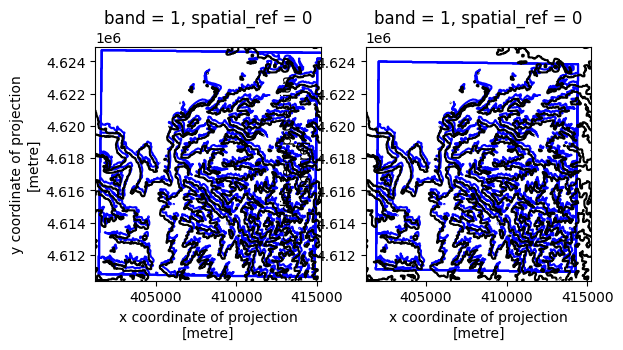

In [12]:
#plot aligned terrain
levels = np.linspace(0, 1000, 10)
ax = plt.subplot(121)
terrain_f.plot.contour(levels=levels,cmap='b',ax=ax)
terrain_srtm.plot.contour(levels=levels,ax=ax,cmap='k')
#ba.to_crs(ds_f.rio.crs).plot(ax=ax,edgecolor='r', facecolor='none',linewidth=2)
ax.set_aspect(1)

ax = plt.subplot(122)
terrain_f2.plot.contour(levels=levels,cmap='b',ax=ax)
terrain_srtm.plot.contour(levels=levels,ax=ax,cmap='k')
#ba.to_crs(ds_f.rio.crs).plot(ax=ax,edgecolor='r', facecolor='none',linewidth=2)
ax.set_aspect(1)